💡 Imagine we have 5 days of stock prices:

Day 1: $100  
Day 2: $102  
Day 3: $105  
Day 4: $107  
Day 5: $110  

If we feed this sequence to an RNN, it will learn to predict Day 6’s stock price based on past trends.

Let’s code a small RNN from scratch (without TensorFlow) to see it in action. 
We'll:
* Define an RNN cell.
* Process a simple sequence.
* Visualize hidden states.

Let’s implement it: 🚀

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define an RNN cell manually
def rnn_step(x_t, h_prev, W_xh, W_hh, b_h):
    h_t = np.tanh(np.dot(W_xh, x_t) + np.dot(W_hh, h_prev) + b_h)
    return h_t

In [5]:
# Initialize weights and bias
np.random.seed(42)
W_xh = np.random.randn(3, 1)  # Weight for input (1D input, 3D hidden state)
W_hh = np.random.randn(3, 3)  # Weight for hidden state
b_h = np.zeros((3, 1))  # Bias

In [6]:
# Output layer weights (for prediction)
W_hy = np.random.randn(1, 3)  # (1 output, 3 hidden units)
b_y = np.zeros((1, 1))

In [15]:
# Example input sequence (normalized stock prices)
x_sequence = np.array([[0.5], [0.8], [1.0], [0.8], [1.1], [1.2], [1.5], [1.0], [1.3]])

In [16]:
x_sequence.shape

(9, 1)

In [17]:
# Initial hidden state
h_t = np.zeros((3, 1))

In [18]:
# Process sequence through the RNN
hidden_states = []
predictions = []
for x_t in x_sequence:
    x_t = x_t.reshape(1, 1) # Fix: Ensure x_t is column vector (1,1)
    h_t = rnn_step(x_t, h_t, W_xh, W_hh, b_h)
    hidden_states.append(h_t)
    print(f"Hidden state: {h_t.flatten()}")  # Print hidden state at each step

    # Prediction (simple linear transformation from hidden state)
    y_t = np.dot(W_hy, h_t) + b_y
    predictions.append(y_t.item())  # Store predicted value


Hidden state: [ 0.24337367 -0.06902223  0.31297878]
Hidden state: [0.61125252 0.07368799 0.49027193]
Hidden state: [0.86059262 0.57396385 0.61495258]
Hidden state: [0.89160528 0.88539979 0.40756466]
Hidden state: [0.9219063  0.94069905 0.53425565]
Hidden state: [0.92951214 0.94262294 0.53180632]
Hidden state: [0.94838904 0.9395542  0.65916905]
Hidden state: [0.9165158  0.94372192 0.39680057]
Hidden state: [0.93878687 0.94738156 0.61512262]


In [19]:
# Convert to numpy arrays for plotting
hidden_states = np.array(hidden_states)
predictions = np.array(predictions)

In [20]:
hidden_states

array([[[ 0.24337367],
        [-0.06902223],
        [ 0.31297878]],

       [[ 0.61125252],
        [ 0.07368799],
        [ 0.49027193]],

       [[ 0.86059262],
        [ 0.57396385],
        [ 0.61495258]],

       [[ 0.89160528],
        [ 0.88539979],
        [ 0.40756466]],

       [[ 0.9219063 ],
        [ 0.94069905],
        [ 0.53425565]],

       [[ 0.92951214],
        [ 0.94262294],
        [ 0.53180632]],

       [[ 0.94838904],
        [ 0.9395542 ],
        [ 0.65916905]],

       [[ 0.9165158 ],
        [ 0.94372192],
        [ 0.39680057]],

       [[ 0.93878687],
        [ 0.94738156],
        [ 0.61512262]]])

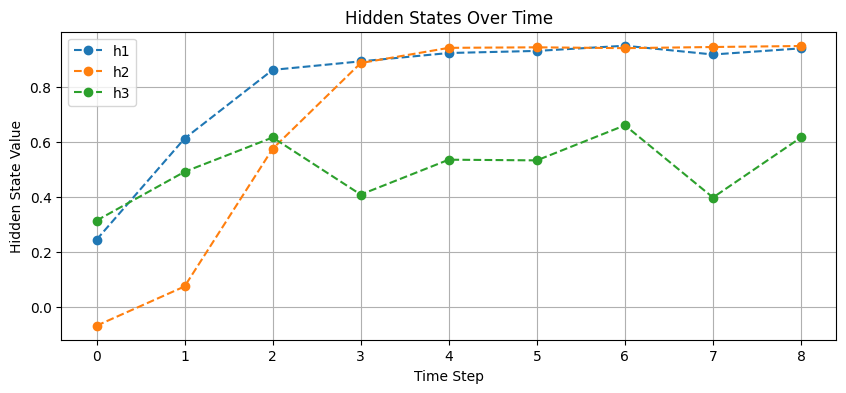

In [21]:
# Convert hidden_states to a (5,3) shape
hidden_states = np.array(hidden_states).squeeze()  # Removes extra dimensions

# Plot hidden states over time
plt.figure(figsize=(10, 4))
for i in range(hidden_states.shape[1]):  # Iterate over 3 hidden state units
    plt.plot(hidden_states[:, i], marker="o", linestyle="dashed", label=f"h{i+1}")

plt.title("Hidden States Over Time")
plt.xlabel("Time Step")
plt.ylabel("Hidden State Value")
plt.legend()
plt.grid()
plt.show()

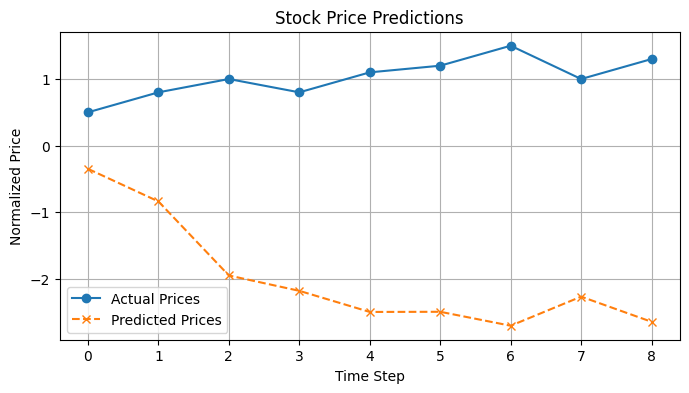

In [22]:
# Plot predictions vs actual data
plt.figure(figsize=(8, 4))
plt.plot(x_sequence, label="Actual Prices", marker="o")
plt.plot(predictions, label="Predicted Prices", marker="x", linestyle="dashed")
plt.title("Stock Price Predictions")
plt.xlabel("Time Step")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid()
plt.show()